# Import libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pacmap

# Plotting Function

In [2]:
def helper_plot_clusters(clust_obj, clust_algo, dimensions = 10, clusters = 4):
    
    # Open dataset of dimensions genes and convert to transposed matrix
    data = "../Data/Variance/most_variable_" + str(dimensions) + ".csv"
    var_genes = pd.read_csv(data, index_col="Unnamed: 0").T

    clust_obj.fit(var_genes)

    # Visualization 2-D
    embedding_2 = pacmap.PaCMAP(n_neighbors=40, random_state=42) 
    pacmap_2_axes = embedding_2.fit_transform(var_genes.values)
    plt.scatter(pacmap_2_axes[:,0], pacmap_2_axes[:,1], c=clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 2-D")
    plt.savefig("../Figures/Assg_3/Clustering/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_2_dim", bbox_inches="tight")
    plt.show()
    
    # Visualization 3-D
    
    embedding_3 = pacmap.PaCMAP(n_components=3, n_neighbors=40) 
    pacmap_3_axes = embedding_3.fit_transform(var_genes.values, init="pca")
    ax = plt.axes(projection ="3d")
    ax.scatter3D(pacmap_3_axes[:,0], pacmap_3_axes[:,1], pacmap_3_axes[:,2], c = clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 3-D")
    plt.savefig("../Figures/Assg_3/Clustering/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_3_dim", bbox_inches="tight")
    plt.show()

Declare a wrapper function for the helper plot_clusters which hides the details and permits picking between KMeans and KMedoids clustering

In [3]:
def plot_clusters(clust_algo, dimensions = 10, clusters = 4):
    if (clust_algo == 'KMeans'):
        clust_obj = KMeans(n_clusters=clusters, random_state=0)
    if (clust_algo == 'KMedoids'):
        clust_obj = KMedoids(n_clusters=clusters, method='pam', init='random', random_state=1234)
    helper_plot_clusters(clust_obj, clust_algo, dimensions, clusters)

[KMeans library from SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

/usr/local/lib/python3.10/site-packages/pacmap/pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


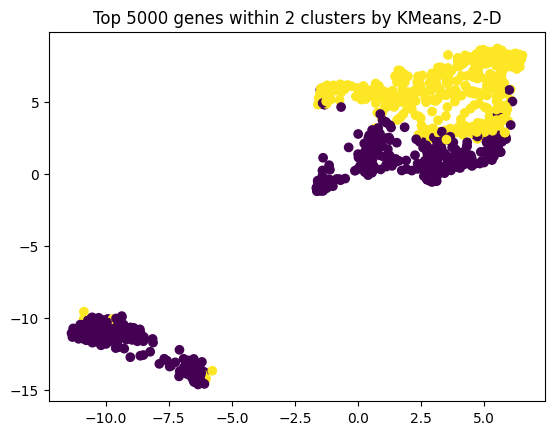

/usr/local/lib/python3.10/site-packages/pacmap/pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


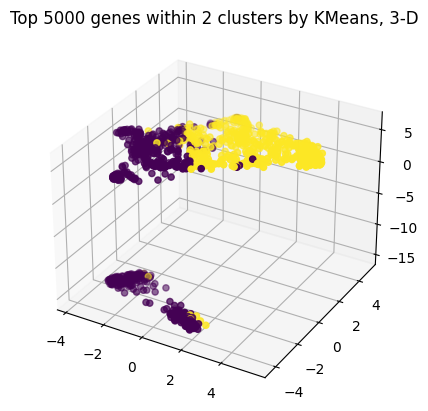

In [4]:
plot_clusters('KMeans', dimensions=5000, clusters=2)

PAM Clustering using [scikit Kmedoids](https://scikit-learn-extra.readthedocs.io/en/stable/install.html)

c:\Users\sckaffs.fernando\AppData\Local\Programs\Python\Python310\lib\site-packages\pacmap\pacmap.py:774: UserWarning:




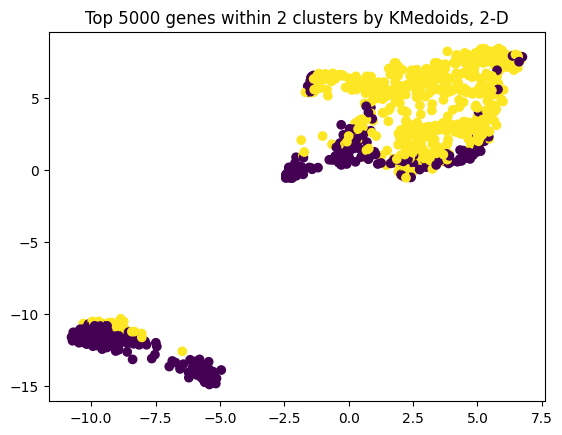

c:\Users\sckaffs.fernando\AppData\Local\Programs\Python\Python310\lib\site-packages\pacmap\pacmap.py:778: UserWarning:




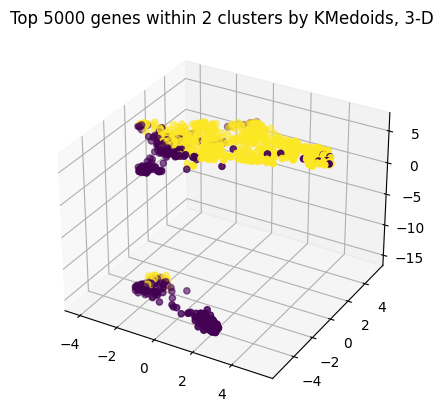

In [18]:
plot_clusters('KMedoids', dimensions = 5000, clusters = 2)

# Sample Heatmap

c:\Users\sckaffs.fernando\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



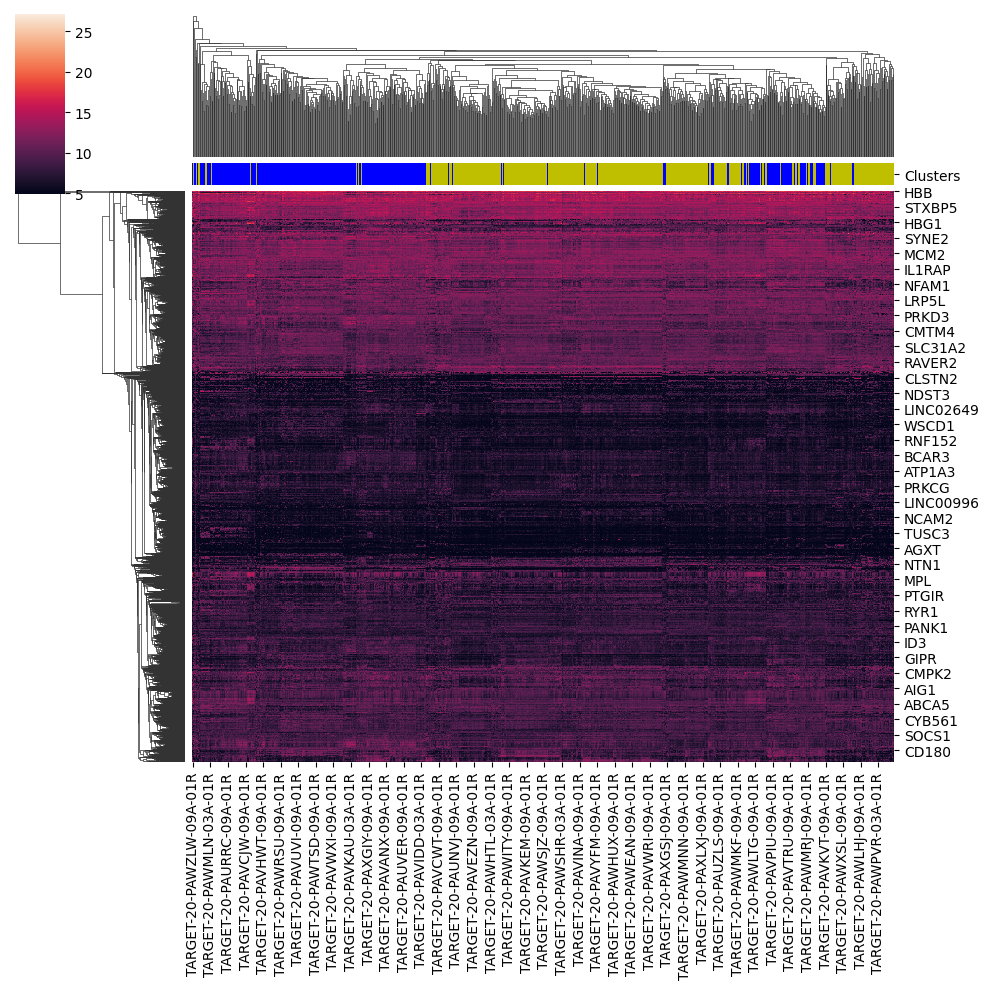

In [17]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_5000.csv", index_col="Unnamed: 0").T
kmeans = KMeans(n_clusters=2, random_state=0).fit(variance_genes)
series = pd.Series(kmeans.labels_)
lut = dict(zip(series.unique(), "by"))
row_colors = series.map(lut)
patients_labels = pd.DataFrame(row_colors.values, variance_genes.index.values).rename(columns={0:"Clusters"})
sns.clustermap(variance_genes.T, col_colors=patients_labels)

# Sample Sankey

In [45]:
df = pd.read_csv('../Data/sankey.csv') #Read above CSV

#Sort by Source and then Destination
df['source'] = pd.Categorical(df['source'], ['0-10', "11-100", "101-1000", "1001-5000", "5001-10000"])
df['destination'] = pd.Categorical(df['destination'], ["Cluster 1", "Cluster 2"])
df.sort_values(['source', 'destination'], inplace = True)
df.reset_index(drop=True)
df.value.to_list()

[8, 2, 32, 58, 544, 356, 1454, 2546, 2371, 2629]

In [71]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = ["0-10", "11-100", "101-1000", "1001-5000", "5001-10000", "Cluster 1", "Cluster 2"],
      color = ['#808B96', '#EC7063', '#F7DC6F', '#4710B0', '#AF7AC5', '#48C9B0', '#982910'],
      x = [0.001, 0.001, 0.001, 0.001, 0.001, 0.999, 0.999],
      y = [0.001, 0.07, 0.2, 0.5, 1, 0.2, 0.99]
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
      target = [5, 6, 5, 6, 5, 6, 5, 6, 5, 6],
      value  = df.value.to_list()
  ))])

fig.update_layout(title_text="Cluster Diagrams, N=10000", font_size=20)
fig.show()

In [85]:
pd.DataFrame([["0 - 10", "Cluster 1", "8 (80%)"], ["", "Cluster 2", "2 (20%)"], ["0 - 100", "Cluster 1", "40 (40%)"], ["", "Cluster 2", "60 (60%)"], 
              ["0 - 1000", "Cluster 1", "584 (58%)"], ["", "Cluster 2", "416 (42%)"], ["0 - 5000", "Cluster 1", "2038 (41%)"], ["", "Cluster 2", "5591 (56%)"], 
              ["0 - 10000", "Cluster 1", "4409 (44%)"], ["", "Cluster 2", "5591 (56%)"]]).rename(columns={0:"Genes", 1:"Cluster", 2:"Cumulative"}).set_index("Genes")

,Cluster,Cumulative
Genes,,
0 - 10,Cluster 1,8 (80%)
,Cluster 2,2 (20%)
0 - 100,Cluster 1,40 (40%)
,Cluster 2,60 (60%)
0 - 1000,Cluster 1,584 (58%)
,Cluster 2,416 (42%)
0 - 5000,Cluster 1,2038 (41%)
,Cluster 2,5591 (56%)
0 - 10000,Cluster 1,4409 (44%)
